# Проект: Анализ поведения пользователей мобильного приложения.

# Описание проекта.

Мы имеем логи мобильного приложения стартапа, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи этого приложения. 

# Цель проекта.

Анализ поведения пользователей мобильного приложения.

# План работы.

**Этап 1. Открыть файл с данными и изучить общую информацию.**

**Этап 2. Подготовить данные.**
* Заменить названия столбцов на удобные для нас.
* Провертиь пропуски и типы данных. Откорректировать, если нужно.
* Добавить столбец даты и времени, а также отдельный столбец дат.

**Этап 3. Изучить и проверить данные.**

Ответить на следующие вопросы:
* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период мы располагаем? Найти максимальную и минимальную дату. Построить гистограмму по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Принять во внимание, что технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». С какого момента данные являются полными (отбросить более старые)? Данными за какой период времени мы располагаем на самом деле?

* Много ли событий и пользователей мы потеряли, отбросив старые данные?
* Есть ли пользователи из всех трёх экспериментальных групп?

**Этап 4. Изучить воронку событий.**

* Определить, какие события есть в логах, как часто они встречаются. Отсортировать события по частоте.
* Определить, сколько пользователей совершали каждое из этих событий. Отсортировать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.
* Предположить, в каком порядке происходят события. Определить, все ли они выстраиваются в последовательную цепочку. Их не нужно учитывать при расчёте воронки.
* По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитать отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* Определить, на каком шаге теряете больше всего пользователей.
* Определить, какая доля пользователей доходит от первого события до оплаты.

**Этап 5. Определить необходимые функции.**

**Этап 6. Изучить результаты эксперимента.**

* Определить, сколько пользователей в каждой экспериментальной группе.
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.
* Определить самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. Проделать то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Определить, корректно ли работает разбиение на группы.
* Аналогично поступите с группой В (экспериментальной). Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. корректно, какие выводы из эксперимента можно сделать.
* Объяснить, какой уровень значимости мы выбрали при проверке статистических гипотез выше. Посчитать, сколько проверок статистических гипотез было сделано. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Определить, какой уровень значимости стоит применить. 

**Написать общий вывод.**

# Выполнение проекта.

## Этап 1. Загрузка файла с данными и изучение общей информации.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math as mth

In [2]:
# загрузка исходных данных
try :
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
    print('Данные загружены из каталога Yandex Practicum.')

except :
    logs = pd.read_csv('res/logs_exp.csv', sep='\t')
    print('Данные загружены из локального каталога.')

Данные загружены из локального каталога.


In [3]:
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
logs.ExpId.unique()

array([246, 248, 247], dtype=int64)

In [6]:
logs.EventName.unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

### Этап 1. Вывод.

Успешно загружены данные из файла `logs_exp.csv`.

Файл содержит в себе 244126 записей событий и 4 поля в каждой записи: 
* название события (содержит всего 5 различных названий), 
* идентификатор устройства пользователя, 
* дата и время события,
* идентификатор группы (246 и 247 - контрольные группы, 248 - экспериментальная).

Поля пропусков не имеют.
<br>Первое поле имеет формат `object`, остальные три - `int64`. 
<br>Для даты необходимо будет изменить формат - сделаем это на 2м этапе.

## Этап 2. Подготовка данных.

### Проверим на дубликаты.

In [7]:
logs.duplicated().sum()

413

In [8]:
print('Доля дубликатов составляет {0:.2%} от общего количества записей.'.format(logs.duplicated().sum() / len(logs)))

Доля дубликатов составляет 0.17% от общего количества записей.


Посмотрим на распределение дубликатов по группам:

In [9]:
# создадим датафрейм с дубликатами:
dup = logs.duplicated().to_frame()
dup_rows = dup[dup[0] == True].index.to_list()
duplicates = logs.loc[dup_rows]

# удалим промежуточный датафрейм:
del dup

# выведем информацию по группам:
groups = [246, 247, 248]
for i in groups :
    print('Количество дубликатов в группе {0}: {1}'.format(i, len(duplicates[duplicates['ExpId'] == i])))
print()
for i in groups :
    print('Количество записей в группе {0}: {1}'.format(i, len(logs[logs.ExpId == i])))
print()
for i in groups :
    print('Доля дубликатов в группе {0} составляет {1:.2%}'
          .format(i,len(duplicates[duplicates['ExpId'] == i]) / len(logs[logs.ExpId == i])))

Количество дубликатов в группе 246: 123
Количество дубликатов в группе 247: 125
Количество дубликатов в группе 248: 165

Количество записей в группе 246: 80304
Количество записей в группе 247: 78075
Количество записей в группе 248: 85747

Доля дубликатов в группе 246 составляет 0.15%
Доля дубликатов в группе 247 составляет 0.16%
Доля дубликатов в группе 248 составляет 0.19%


In [10]:
logs.drop_duplicates(inplace=True)

# сохраним в переменную количество уникальных данных:
initial_data_len = len(logs)
print('После удаления дубликатов осталось {0} записей о событиях.'.format(initial_data_len))

После удаления дубликатов осталось 243713 записей о событиях.


Доля дубликатов очень небольшая, их распределене по группам тоже без серьезных отклонений.

In [11]:
logs = logs.reset_index(drop=True)

### Заменим названия столбцов на удобные для нас.

In [12]:
logs.columns = ['event_name', 'device_id', 'event_ts_in_sec', 'group_id']
logs.head()

,event_name,device_id,event_ts_in_sec,group_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Изменим тип данных для даты и времени. Добавим необходимые столбцы.

Как мы выяснили ранее, данные пропусков не имеют, но тип данных для `timestamp` не соответсвует необходимому. Изменим его и сохраним в новом столбце:

In [13]:
logs['event_dt'] = pd.to_datetime(logs['event_ts_in_sec'], unit='s')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id        243713 non-null  int64         
 2   event_ts_in_sec  243713 non-null  int64         
 3   group_id         243713 non-null  int64         
 4   event_dt         243713 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.3+ MB


Теперь Ок. Добавим еще один столбец - только с датой:

In [14]:
logs['event_date'] = logs['event_dt'].dt.date
logs.head()

,event_name,device_id,event_ts_in_sec,group_id,event_dt,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


### Этап 2. Вывод.

Проверка на дубликаты показала, что их количество состаляет 413 или 0.17% от общего количества записей.

Распределение дубликатов по группам:
* доля дубликатов в группе 246 составляет 0.15%
* доля дубликатов в группе 247 составляет 0.16%
* доля дубликатов в группе 248 составляет 0.19%

Дубликаты удалены.

Данные пропусков не имеют.

Проведено преобразование количество секунд из формата`int64` в формат `datetime`, отображающий информацию в виде 'дата + время'. Данные сохранены в столбце `event_dt`.

Также добавлен отдельный столбец, где хранится только дата события - `event_date`.

## Этап 3. Изучение и проверка данных.

### Посмотрим, сколько всего событий в логе.

In [15]:
print('Всего событий:', len(logs))
for i in groups :
    print('Количество событий в группе {0}: {1}'.format(i, len(logs[logs.group_id == i])))

Всего событий: 243713
Количество событий в группе 246: 80181
Количество событий в группе 247: 77950
Количество событий в группе 248: 85582


### Определим, сколько всего пользователей в логе.

**Важно!**

Для этого примем допущение: одно устройство - один пользователь. В реальности это не совсем верно - у одного пользователя может быть несколько устройств (например, рабочий и личный смартфоны, или смартфон и планшет), и с одного устройства могут осуществлять заказы разные люди (например, члены семьи).

In [16]:
initial_users_qty =  logs['device_id'].nunique()
print('Всего уникальных пользователей: {0}'.format(initial_users_qty))

Всего уникальных пользователей: 7551


### Определим, сколько в среднем событий приходится на пользователя.

In [17]:
print('Среднее число событий на пользователя: {0:.2f}'.format(len(logs) / logs['device_id'].nunique()))

Среднее число событий на пользователя: 32.28


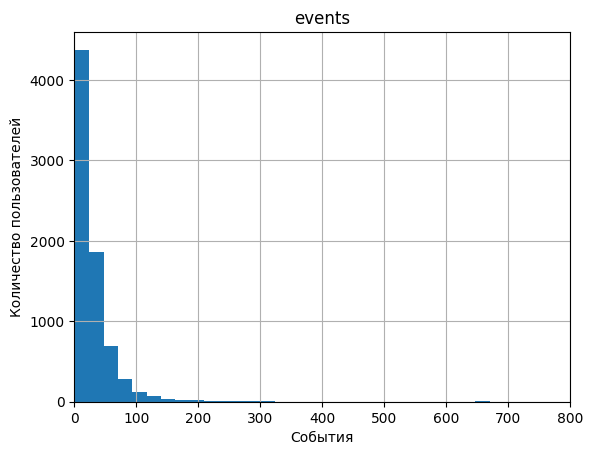

In [18]:
logs.groupby('device_id').agg(events=('device_id', 'count')).hist(bins=100)
plt.ylabel('Количество пользователей')
plt.xlabel('События')
plt.xlim(0, 800);

### Определим период, за какой мы располагаем данными.

Найдем максимальную и минимальную дату:

In [19]:
logs['event_dt'].min()

Timestamp('2019-07-25 04:43:36')

In [20]:
logs['event_dt'].max()

Timestamp('2019-08-07 21:15:17')

Определим интервал для подсчета количества корзин для гистограммы:

In [21]:
logs['event_dt'].max() - logs['event_dt'].min()

Timedelta('13 days 16:31:41')

Построим гистограмму:

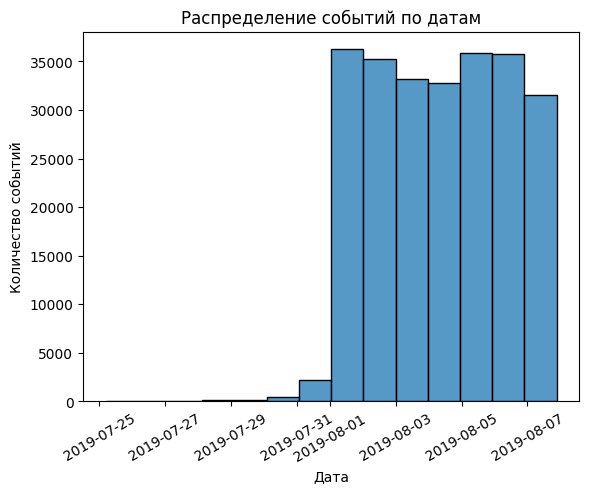

In [22]:
sns.histplot(data=logs['event_dt'], bins=14).set_title('Распределение событий по датам')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.xticks(rotation=30);

Посмотрим то же самое в таблице:

In [23]:
logs.groupby(['event_date']).agg(events=('event_date' , 'count'))

,events
event_date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


Мы видим, что нормальное количество данных собирается только начиная с 01.08.2019. Так как мы не знаем причины "кривизны" получения данных, то все, что получено до этой даты, необходимо отбросить. И посмотрим, сколько данных осталось:

In [24]:
logs = logs[logs['event_dt'] >= pd.Timestamp('2019-08-01')]
len(logs)

240887

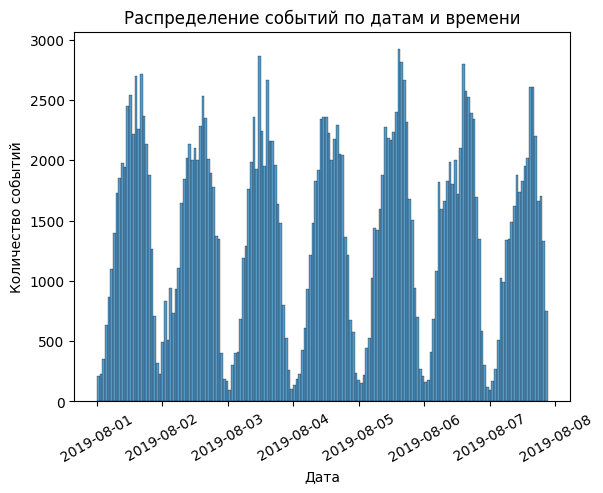

In [25]:
sns.histplot(data=logs['event_dt'], bins=7*24).set_title('Распределение событий по датам и времени')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.xticks(rotation=30);

Ночью активность пользователей наименьшая, что ожидаемо. Явной зависимости от дня недели нет.

Реальный период, по которому мы располагаем данными: 01.08.2019 - 07.08.2019.

### Определим, много ли событий и пользователей мы потеряли, отбросив старые данные.

Посчитаем, какой процент данных остался после того, как мы отбросили аномальную часть данных:

In [26]:
print('Осталось {0:.2%} данных от первоначального их числа.'.format(len(logs) / initial_data_len))

Осталось 98.84% данных от первоначального их числа.


Посчитаем, какой процент пользователей остался после того, как мы отбросили аномальную часть данных:

In [27]:
print('Осталось {0:.2%} пользователей от первоначального их числа.'
      .format(logs['device_id'].nunique() / initial_users_qty))

Осталось 99.77% пользователей от первоначального их числа.


В результате мы удалили незначительную часть данных:
* 1.16% о событиях
* 0.23% о пользователях

### Проверим, есть ли пользователи из всех трёх экспериментальных групп.

In [28]:
len(set(logs[logs.group_id == 246]['device_id']) & set(logs[logs.group_id == 247]['device_id']) 
 & set(logs[logs.group_id == 248]['device_id']))

0

Теперь посмотрим на наличие пользователей в 2 группах. Проверим все возможные пары:

In [29]:
len(set(logs[logs.group_id == 246]['device_id']) & set(logs[logs.group_id == 247]['device_id']) )

0

In [30]:
len(set(logs[logs.group_id == 246]['device_id']) & set(logs[logs.group_id == 248]['device_id']) )

0

In [31]:
len(set(logs[logs.group_id == 247]['device_id']) & set(logs[logs.group_id == 248]['device_id']) )

0

Мы видим, что наличия одних и тех же пользователей в различных группах нет - по этому параметру данные собраны корректно.

### Этап 3. Вывод.

Мы определили, что:
* Всего уникальных событий: 243713
* Всего уникальных пользователей: 7551
* Среднее число событий на пользователя: 32.28
* Реальный период, по которому мы располагаем данными: 01.08.2019 - 07.08.2019.
* После удаления аномальной части данных:
    - Осталось 98.84% данных от первоначального их числа.
    - Осталось 99.77% пользователей от первоначального их числа.
* Пользователей, присутствующих одновременно во всех трех группах - нет.
* Пользователей, присутствующих одновременно в каких-либо двух группах - нет.

Реальный период, по которому мы располагаем данными: 01.08.2019 - 07.08.2019.

Все три группы имеют уникальный набор пользователей, пересечений нет.

## Этап 4. Изучение воронки событий.

### Определим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

Как мы определили ранее, всего есть 5 названий событий. Выведем их:

In [32]:
print(*logs['event_name'].unique().tolist())

Tutorial MainScreenAppear OffersScreenAppear CartScreenAppear PaymentScreenSuccessful


Теперь посмотрим на их частоту:

In [33]:
logs.groupby('event_name').agg(events=('device_id' , 'count')).sort_values(by='events', ascending=False)

,events
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


### Определить, сколько пользователей совершали каждое из этих событий. Отсортировать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.

In [34]:
# сделаем сводную таблицу:
events_by_users = logs.groupby('event_name').agg(users=('device_id' , 'nunique')).sort_values(by='users' ,ascending=False)

# добавим долю пользователей для каждого из событий:
events_by_users['share'] = events_by_users['users'] / logs['device_id'].nunique()

# отформатируем и выведем на экран:
events_by_users.style.format({'share' : '{:.1%}'})

,users,share
event_name,,
MainScreenAppear,7419,98.5%
OffersScreenAppear,4593,61.0%
CartScreenAppear,3734,49.6%
PaymentScreenSuccessful,3539,47.0%
Tutorial,840,11.1%


### Предположить, в каком порядке происходят события. Определить, все ли они выстраиваются в последовательную цепочку. Их не нужно учитывать при расчёте воронки.

In [35]:
print(*events_by_users.index.tolist())

MainScreenAppear OffersScreenAppear CartScreenAppear PaymentScreenSuccessful Tutorial


Воронка должна выглядеть следующим образом:

`MainScreenAppear` -> `OffersScreenAppear` -> `CartScreenAppear` -> `PaymentScreenSuccessful`

`Tutorial`  в воронку не входит.

### По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитать отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [36]:
# уберем из воронки в нее не входящее:
funnel = events_by_users.drop(index='Tutorial')

# посчитаем конверсию:
funnel['conversion'] = funnel['users'] / funnel['users'].shift()

# добавим конверсию для первого пункта, так как мы уже знаем, что не 100% открывают основной экран
funnel = funnel.fillna(funnel.loc['MainScreenAppear', 'share'])

# выведем результат:
funnel[['users', 'conversion']].style.format({'conversion' : '{:.1%}'})

,users,conversion
event_name,,
MainScreenAppear,7419,98.5%
OffersScreenAppear,4593,61.9%
CartScreenAppear,3734,81.3%
PaymentScreenSuccessful,3539,94.8%


Показатели очень хорошие, но есть 2 странности:
* 1.5% вообще не попадают на основной экран;
* резкая просадка на первом этапе воронки - только 61.9% переходят с основного экрана к предложениям.

### Определить, на каком шаге теряете больше всего пользователей.

Больше всего пользователей мы теряем на первом этапе воронки - только 61.9% переходят с основного экрана к предложениям. <br>Это при том, что конверсия на остальных этапах составляет 98.5%, 81.3% и 94.8%.

### Определить, какая доля пользователей доходит от первого события до оплаты.

In [37]:
print('До оплаты доходит {0:.1%} пользователей.'
.format(funnel.loc['PaymentScreenSuccessful', 'users'] / funnel.loc['MainScreenAppear', 'users']))

До оплаты доходит 47.7% пользователей.


### Этап 4. Вывод.

В исходных данных имеется всего 5 различных событий. По частоте они распределены следующим образом:

| event_name | events |
| --- | --- |
|MainScreenAppear |117328 |
|OffersScreenAppear |46333 |
|CartScreenAppear |42303 |
|PaymentScreenSuccessful |33918 |
|Tutorial |1005 |

Мы посчитали количество уникальных пользователей и их долю для каждого из событий:

| event_name | users | share |
| --- | --- | --- |
|MainScreenAppear |7419 |98.5% |
|OffersScreenAppear |4593 |61.0% |
|CartScreenAppear |3734 |49.6% |
|PaymentScreenSuccessful |3539 |47.0% |
|Tutorial |840 |11.1% |

Исходя из полученных данных, воронка выглядит следующим образом:
<br>`MainScreenAppear` -> `OffersScreenAppear` -> `CartScreenAppear` -> `PaymentScreenSuccessful`
<br>Событие `Tutorial`  в воронку не входит.

Мы рассчитали конверсию для каждого из этапов воронки:

| event_name | users | conversion |
| --- | --- | --- |
|MainScreenAppear |7419 |98.5% |
|OffersScreenAppear |4593 |61.9% |
|CartScreenAppear |3734 |81.3% |
|PaymentScreenSuccessful |3539 |94.8% |

Больше всего пользователей мы теряем на первом этапе воронки - только 61.9% переходят с основного экрана к предложениям.
Это при том, что конверсия на остальных этапах составляет 98.5%, 81.3% и 94.8%.

До оплаты доходит 47.7% пользователей от первого события (что составляет 47% от общего числа пользователей).

**Предложения:**
* Проверить, почему 1.5% пользователей вообще не попадают на главный экран.
* Проверить, почему конверсия 1го этапа (`MainScreenAppear` -> `OffersScreenAppear`) резко ниже всех остальных. С большой долей вероятности можно предроложить, что имеет место неявная проблема.

**Комментарий:**

Тот факт, что 1.5% пользователей не попадают на главный экран, говорит о необходимости оптимизации самой воронки. Это ведь не сайт, а мобильное приложение. На главном экране размещаются новинки, специальные предложения и персонифицированные подборки - а пользователь проходит мимо этого. Наряду с техническими проблемеми, это может являться причиной столь низкой относительной конверсии первого этапа (`MainScreenAppear` -> `OffersScreenAppear`). Именно в этой точке находится самый большой потенциал для роста.

## Объявление функций.

### distr_cdf

In [38]:
def distr_cdf(successes, inbound) :
    '''
    функция расчета значения p-value двустороннего z-теста.
    '''

    # пропорция успехов в первой группе:
    p1 = successes[0]/inbound[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/inbound[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (inbound[0] + inbound[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/inbound[0] + 1/inbound[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)  

    # статистику возьмём по модулю, т.к тест двусторонний. По этой же причине удваиваем результат
    return (1 - distr.cdf(abs(z_value))) * 2

## Этап 5. Изучение результатов эксперимента.

### Определим, сколько пользователей в каждой экспериментальной группе.

In [39]:
# подсчитаем и сохраним количество пользователей по группам:
users_qty_by_group = {}
for i in groups :
    users_qty_by_group[i] = logs[logs['group_id'] == i]['device_id'].nunique()
    print('Количество уникальных пользователей в группе {0}: {1}'.format(i, users_qty_by_group[i]))

Количество уникальных пользователей в группе 246: 2484
Количество уникальных пользователей в группе 247: 2513
Количество уникальных пользователей в группе 248: 2537


### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.

Разобьём данные по группам:

In [40]:
g246_df = logs[logs['group_id'] == 246]
g247_df = logs[logs['group_id'] == 247]
g248_df = logs[logs['group_id'] == 248]

Проверим распределение по критерию Шапиро-Уилка для 246 группы по пользователям и датам:

In [41]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(g246_df.groupby('event_date').agg(data=('device_id' , 'nunique'))['data'].to_list())
p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормальное.') 

p_value = 0.279
Не получилось отвергнуть нулевую гипотезу, распределение нормальное.


Проверим распределение по критерию Шапиро-Уилка для 247 группы по пользователям и датам:

In [42]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(g247_df.groupby('event_date').agg(data=('device_id' , 'nunique'))['data'].to_list())
p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормальное.') 

p_value = 0.709
Не получилось отвергнуть нулевую гипотезу, распределение нормальное.


Проверим распределение по критерию Шапиро-Уилка для 246 группы по событиям и датам:

In [43]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(g246_df.groupby('event_date').agg(data=('device_id' , 'count'))['data'].to_list())
p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормальное.') 

p_value = 0.554
Не получилось отвергнуть нулевую гипотезу, распределение нормальное.


Проверим распределение по критерию Шапиро-Уилка для 247 группы по событиям и датам:

In [44]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(g247_df.groupby('event_date').agg(data=('device_id' , 'count'))['data'].to_list())
p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормальное.') 

p_value = 0.611
Не получилось отвергнуть нулевую гипотезу, распределение нормальное.


Обе контрольные группы (246 и 247) проходят тест Шапиро-Уилка, распределение нормальное и в разрезе пользователь/дата, и в разрезе событие/дата.

Применим тест Манна-Уитни для проверки среднего числа событий в группах 246 и 247 по дням.

In [45]:
alpha = 0.05  # критический уровень статистической значимости

result =  stats.mannwhitneyu(g246_df.groupby('event_date').agg(data=('device_id' , 'count'))['data'].to_list(), 
                             g247_df.groupby('event_date').agg(data=('device_id' , 'count'))['data'].to_list())

p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: среднее число событий по дням различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, среднее число событий по дням не различается.') 

p_value = 0.611
Не получилось отвергнуть нулевую гипотезу, среднее число событий по дням не различается.


Применим тест Манна-Уитни для проверки среднего числа пользователей в группах 246 и 247 по дням.

In [46]:
alpha = 0.05  # критический уровень статистической значимости

result =  stats.mannwhitneyu(g246_df.groupby('event_date').agg(data=('device_id' , 'nunique'))['data'].to_list(), 
                             g247_df.groupby('event_date').agg(data=('device_id' , 'nunique'))['data'].to_list())

p_value = results[1] 

print(f'p_value = {p_value:.3f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: среднее число пользователей по дням различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, среднее число пользователей по дням не различается.') 

p_value = 0.611
Не получилось отвергнуть нулевую гипотезу, среднее число пользователей по дням не различается.


Обе контрольные группы (246 и 247) совместно проходят тест Манна-Уитни в разрезе событие/дата и пользователи/дата, статистически значимых различий не выявлено.

z-тесты сделаем в следующем блоке.

### Определить самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. Проделать то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Определить, корректно ли работает разбиение на группы.

Самое популярное событие мы определили ранее, это `MainScreenAppear`.

Посчитаем число пользователей для него. Для этого соберём сводные данные по событиям и пользователям в один датафрейм:

In [47]:
# сначала подготовим сводную таблицу по 246 группе:
events_by_users_and_groups = (g246_df.groupby('event_name').
 agg(users=('device_id' , 'nunique')).sort_values(by='users', ascending=False).drop(index='Tutorial'))

# добавим к ней данные по 247 группе:
events_by_users_and_groups = events_by_users_and_groups.join((g247_df.groupby('event_name').
    agg(users=('device_id' , 'nunique')).sort_values(by='users',
    ascending=False).drop(index='Tutorial')), lsuffix='_246', rsuffix='_247')

# добавим к ней данные по последней, 248 группе:
events_by_users_and_groups = events_by_users_and_groups.join((g248_df.groupby('event_name').
    agg(users=('device_id' , 'nunique')).sort_values(by='users',
    ascending=False).drop(index='Tutorial')))

# Переименуем последний столбец:
events_by_users_and_groups = events_by_users_and_groups.rename(columns={'users' : 'users_248'})

# выведем результат:
events_by_users_and_groups

,users_246,users_247,users_248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


Добавим общее число пользователей по группам:

In [48]:
events_by_users_and_groups.loc['Initial'] = [users_qty_by_group[246], users_qty_by_group[247], users_qty_by_group[248]]
events_by_users_and_groups = events_by_users_and_groups.sort_values(by='users_246', ascending=False)

events_by_users_and_groups

,users_246,users_247,users_248
event_name,,,
Initial,2484,2513,2537
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


Добавим доли пользователей для каждой из групп:

In [49]:
events_by_users_and_groups['share_246'] = (events_by_users_and_groups['users_246'] 
                                           / events_by_users_and_groups['users_246'].shift())

events_by_users_and_groups['share_247'] = (events_by_users_and_groups['users_247'] 
                                           / events_by_users_and_groups['users_247'].shift())

events_by_users_and_groups['share_248'] = (events_by_users_and_groups['users_248'] 
                                           / events_by_users_and_groups['users_248'].shift())

# изменим порядок столбцов для удобства:
columns_list = events_by_users_and_groups.columns.to_list()
new_order = []
new_order.append(columns_list[0])
new_order.append(columns_list[-3])
new_order.append(columns_list[1])
new_order.append(columns_list[-2])
new_order.append(columns_list[2])
new_order.append(columns_list[-1])
events_by_users_and_groups = events_by_users_and_groups.reindex(columns=new_order)

# выведем на экран без начальной строки:
events_by_users_and_groups[1:].style.format({'share_246' : '{:.1%}', 'share_247' : '{:.1%}', 'share_248' : '{:.1%}'})

,users_246,share_246,users_247,share_247,users_248,share_248
event_name,,,,,,
MainScreenAppear,2450,98.6%,2476,98.5%,2493,98.3%
OffersScreenAppear,1542,62.9%,1520,61.4%,1531,61.4%
CartScreenAppear,1266,82.1%,1238,81.4%,1230,80.3%
PaymentScreenSuccessful,1200,94.8%,1158,93.5%,1181,96.0%


In [50]:
# создадим список количества пользователей для каждого из этапов воронки для каждой группы.

# создадим список с количеством пользователей для каждого из событий для группы 246:
u246 = events_by_users_and_groups['users_246'].to_list()

# создадим список с количеством пользователей для каждого из событий для группы 247:
u247 = events_by_users_and_groups['users_247'].to_list()

# создадим список с количеством пользователей для каждого из событий для группы 248:
u248 = events_by_users_and_groups['users_248'].to_list()

# создадим список событий (включая `Initial`, которое событием не является, но необходимо для дальнейших расчётов)
event_names = events_by_users_and_groups.index.to_list()

# проверим, что получилось:
print('u246=', u246)
print('u247=', u247)
print('u248=', u248)
print(event_names)

u246= [2484, 2450, 1542, 1266, 1200]
u247= [2513, 2476, 1520, 1238, 1158]
u248= [2537, 2493, 1531, 1230, 1181]
['Initial', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']


Проведем статистический анализ групп 246 и 247 (z-тест):

Сформулируем гипотезы для z-теста:
* **нулевая: статистически значимой разницы между конверсией в тестируемых группах нет**
* **альтернативная: статистически значимая разница между конверсией есть**

In [51]:
# подготовим данные по 2 группам: исходное количество пользователей и количество успешных пользователей события:
for i in range(1, len(event_names)) :
    
    # выберем данные для текущего события и для сравнения
    inbound = [u246[0], u247[0]]
    successes = [u246[i], u247[i]]

    # зададим критический уровень статистической значимости:
    alpha = 0.05

    # вызовем нашу статистическую функцию для расчета p-value:
    p_value = distr_cdf(successes, inbound) 

    print(f'Расчет для события `{event_names[i]}`:')
    print(f'p_value = {p_value:.3f}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: статистически значимая разница между конверсией есть.')
    else:
        print(
            'статистически значимой разницы между конверсией в тестируемых группах нет.'
        ) 
    print()

Расчет для события `MainScreenAppear`:
p_value = 0.757
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `OffersScreenAppear`:
p_value = 0.248
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `CartScreenAppear`:
p_value = 0.229
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `PaymentScreenSuccessful`:
p_value = 0.115
статистически значимой разницы между конверсией в тестируемых группах нет.



Разбиение на контрольные группы (246 и 247) корректно - ни по одному из событий мы не можем отвергнуть нулевую гипотезу, нет оснований считать доли разными (z-тест). 

### Аналогично поступите с группой В (экспериментальной). Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. корректно, какие выводы из эксперимента можно сделать.

Проведем статистический анализ групп 246 и 248 (z-тест):

In [52]:
# подготовим данные по 2 группам: исходное количество пользователей и количество успешных пользователей события
# первую строку пропускаем - это начальные данные для расчёта:
for i in range(1, len(event_names)) :
    
    # выберем данные для текущего события и для сравнения
    inbound = [u246[0], u248[0]]
    successes = [u246[i], u248[i]]

    # зададим критический уровень статистической значимости:
    alpha = 0.05 / 3

    # вызовем нашу статистическую функцию для расчета p-value:
    p_value = distr_cdf(successes, inbound) 

    print(f'Расчет для события `{event_names[i]}`:')
    print(f'p_value = {p_value:.3f}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: статистически значимая разница между конверсией есть.')
    else:
        print(
            'статистически значимой разницы между конверсией в тестируемых группах нет.'
        ) 
    print()

Расчет для события `MainScreenAppear`:
p_value = 0.295
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `OffersScreenAppear`:
p_value = 0.208
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `CartScreenAppear`:
p_value = 0.078
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `PaymentScreenSuccessful`:
p_value = 0.212
статистически значимой разницы между конверсией в тестируемых группах нет.



Статистических различий между 246 и 248 группами не выявлено (z-тест).

Переходим к группам 247 и 248 (z-тест):

In [53]:
# подготовим данные по 2 группам: исходное количество пользователей и количество успешных пользователей события.
# первую строку пропускаем - это начальные данные для расчёта:
for i in range(1, len(event_names)) :
    
    # выберем данные для текущего события и для сравнения 
    inbound = [u247[0], u248[0]]
    successes = [u247[i], u248[i]]

    # зададим критический уровень статистической значимости:
    alpha = 0.05 / 3

    # вызовем нашу статистическую функцию для расчета p-value:
    p_value = distr_cdf(successes, inbound) 

    print(f'Расчет для события `{event_names[i]}`:')
    print(f'p_value = {p_value:.3f}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: статистически значимая разница между конверсией есть.')
    else:
        print(
            'статистически значимой разницы между конверсией в тестируемых группах нет.'
        ) 
    print()

Расчет для события `MainScreenAppear`:
p_value = 0.459
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `OffersScreenAppear`:
p_value = 0.920
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `CartScreenAppear`:
p_value = 0.579
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `PaymentScreenSuccessful`:
p_value = 0.737
статистически значимой разницы между конверсией в тестируемых группах нет.



Статистических различий между 247 и 248 группами не выявлено (z-тест).

In [54]:
events_by_users_and_groups['aa_group'] = events_by_users_and_groups['users_246'] + events_by_users_and_groups['users_247']
events_by_users_and_groups['aa_group_share'] = (events_by_users_and_groups['aa_group'] 
                                                / events_by_users_and_groups['aa_group'].shift())

# отформатируем и выведем на экран:
columns_to_format = events_by_users_and_groups[['share_246', 'share_247', 'share_248', 'aa_group_share']] 
events_by_users_and_groups.style.format('{:.1%}', subset=[col for col in columns_to_format])

,users_246,share_246,users_247,share_247,users_248,share_248,aa_group,aa_group_share
event_name,,,,,,,,
Initial,2484,nan%,2513,nan%,2537,nan%,4997,nan%
MainScreenAppear,2450,98.6%,2476,98.5%,2493,98.3%,4926,98.6%
OffersScreenAppear,1542,62.9%,1520,61.4%,1531,61.4%,3062,62.2%
CartScreenAppear,1266,82.1%,1238,81.4%,1230,80.3%,2504,81.8%
PaymentScreenSuccessful,1200,94.8%,1158,93.5%,1181,96.0%,2358,94.2%


In [55]:
# создадим список количества пользователей для каждого из этапов воронки для объединённой группы:

# добавим количество пользователей для каждого из событий для группы 246:
u_aa = events_by_users_and_groups['aa_group'].to_list()

# выведем на экран:
u_aa

[4997, 4926, 3062, 2504, 2358]

Остальные данные у нас уже есть, можем проводить тест:

In [56]:
# подготовим данные по 2 группам: исходное количество пользователей и количество успешных пользователей события.
# первую строку пропускаем - это начальные данные для расчёта:
for i in range(1, len(event_names)) :
    
    # выберем данные для текущего события и для сравнения
    inbound = [u_aa[0], u248[0]]
    successes = [u_aa[i], u248[i]]

    # зададим критический уровень статистической значимости:
    alpha = 0.05 / 3

    # вызовем нашу статистическую функцию для расчета p-value:
    p_value = distr_cdf(successes, inbound) 

    print(f'Расчет для события `{event_names[i]}`:')
    print(f'p_value = {p_value:.3f}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: статистически значимая разница между конверсией есть.')
    else:
        print(
            'статистически значимой разницы между конверсией в тестируемых группах нет.'
        ) 
    print()

Расчет для события `MainScreenAppear`:
p_value = 0.294
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `OffersScreenAppear`:
p_value = 0.434
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `CartScreenAppear`:
p_value = 0.182
статистически значимой разницы между конверсией в тестируемых группах нет.

Расчет для события `PaymentScreenSuccessful`:
p_value = 0.600
статистически значимой разницы между конверсией в тестируемых группах нет.



Статистических различий между объединённой контрольной (246+247) и экспериментальной (248) группами не выявлено (z-тест).

### Объяснить, какой уровень значимости мы выбрали при проверке статистических гипотез выше. Посчитать, сколько проверок статистических гипотез было сделано. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Определить, какой уровень значимости стоит применить. 

Мы выбрали критический уровень статистической значимости alpha = 0.05. Это устоявшаяся практика - использовать такое значение. Безусловно, это не догма, можно выбрать любое обоснованное значение.

Всего мы проводим 4 теста - 1 контрольный и 3 экспериментальных.

Первый тест является контрольным (группы 246 и 247), поэтому поправки в критический уровень статистической значимости вносить не надо, оставляем его значение на уровне 0.05

Остальные тесты экспериментальные, а проверка является множественной. Поэтому необходимо применить поправку Бонферрони у установить критический уровень статистической значимости для каждого из экспериментальных тестов на уровне 0.05/3.

### Этап 5. Вывод.

Мы определили количество пользователей по грппам:
* Количество уникальных пользователей в группе 246: 2484
* Количество уникальных пользователей в группе 247: 2513
* Количество уникальных пользователей в группе 248: 2537

Разбиение на контрольные группы (246 и 247) корректно - ни по одному из событий мы не можем отвергнуть нулевую гипотезу, нет оснований считать доли разными (z-тест).

Статистических различий между 246 и 248 группами не выявлено (z-тест).

Статистических различий между 247 и 248 группами не выявлено (z-тест).

Статистических различий между объединённой контрольной (246+247) и экспериментальной (248) группами не выявлено (z-тест).

Мы выбрали критический уровень статистической значимости alpha = 0.05. Это устоявшаяся практика - использовать такое значение. Безусловно, это не догма, можно выбрать любое обоснованное значение.

Всего мы проводим 4 теста - 1 контрольный и 3 экспериментальных.
<br>Первый тест является контрольным (группы 246 и 247), поэтому поправки в критический уровень статистической значимости вносить не надо, оставляем его значение на уровне 0.05
<br>Остальные тесты экспериментальные, а проверка является множественной. Поэтому необходимо применить поправку Бонферрони у установить критический уровень статистической значимости для каждого из экспериментальных тестов на уровне 0.05/3.


**Рекомендаций к внедрению изменения в основной релиз НЕТ.**

# Общий вывод.

---

Успешно загружены данные из файла `logs_exp.csv`.

Файл содержит в себе 244126 записей событий и 4 поля в каждой записи: 
* название события (содержит всего 5 различных названий), 
* идентификатор устройства пользователя, 
* дата и время события,
* идентификатор группы (246 и 247 - контрольные группы, 248 - экспериментальная).

Поля пропусков не имеют.
<br>Первое поле имеет формат `object`, остальные три - `int64`. 
<br>Для даты необходимо будет изменить формат - сделаем это на 2м этапе.

---

Проверка на дубликаты показала, что их количество состаляет 413 или 0.17% от общего количества записей.

Распределение дубликатов по группам:
* доля дубликатов в группе 246 составляет 0.15%
* доля дубликатов в группе 247 составляет 0.16%
* доля дубликатов в группе 248 составляет 0.19%

Дубликаты удалены.

Данные пропусков не имеют.

Проведено преобразование количество секунд из формата`int64` в формат `datetime`, отображающий информацию в виде 'дата + время'. Данные сохранены в столбце `event_dt`.

Также добавлен отдельный столбец, где хранится только дата события - `event_date`.

---

Мы определили, что:
* Всего уникальных событий: 243713
* Всего уникальных пользователей: 7551
* Среднее число событий на пользователя: 32.28
* Реальный период, по которому мы располагаем данными: 01.08.2019 - 07.08.2019.
* После удаления аномальной части данных:
    - Осталось 98.84% данных от первоначального их числа.
    - Осталось 99.77% пользователей от первоначального их числа.
* Пользователей, присутствующих одновременно во всех трех группах - нет.
* Пользователей, присутствующих одновременно в каких-либо двух группах - нет.

Реальный период, по которому мы располагаем данными: 01.08.2019 - 07.08.2019.

Все три группы имеют уникальный набор пользователей, пересечений нет.

---

В исходных данных имеется всего 5 различных событий. По частоте они распределены следующим образом:

| event_name | events |
| --- | --- |
|MainScreenAppear |117328 |
|OffersScreenAppear |46333 |
|CartScreenAppear |42303 |
|PaymentScreenSuccessful |33918 |
|Tutorial |1005 |

Мы посчитали количество уникальных пользователей и их долю для каждого из событий:

| event_name | users | share |
| --- | --- | --- |
|MainScreenAppear |7419 |98.5% |
|OffersScreenAppear |4593 |61.0% |
|CartScreenAppear |3734 |49.6% |
|PaymentScreenSuccessful |3539 |47.0% |
|Tutorial |840 |11.1% |

Исходя из полученных данных, воронка выглядит следующим образом:
<br>**`MainScreenAppear` -> `OffersScreenAppear` -> `CartScreenAppear` -> `PaymentScreenSuccessful`**
<br>Событие `Tutorial`  в воронку не входит.

Мы рассчитали конверсию для каждого из этапов воронки:

| event_name | users | conversion |
| --- | --- | --- |
|MainScreenAppear |7419 |98.5% |
|OffersScreenAppear |4593 |61.9% |
|CartScreenAppear |3734 |81.3% |
|PaymentScreenSuccessful |3539 |94.8% |

Больше всего пользователей мы теряем на первом этапе воронки - только 61.9% переходят с основного экрана к предложениям.
Это при том, что конверсия на остальных этапах составляет 98.5%, 81.3% и 94.8%.

До оплаты доходит 47.7% пользователей от первого события (что составляет 47% от общего числа пользователей).

---

Мы определили количество пользователей по грппам:
* Количество уникальных пользователей в группе 246: 2484
* Количество уникальных пользователей в группе 247: 2513
* Количество уникальных пользователей в группе 248: 2537

Разбиение на контрольные группы (246 и 247) корректно - ни по одному из событий мы не можем отвергнуть нулевую гипотезу, нет оснований считать доли разными (z-тест).

Статистических различий между 246 и 248 группами не выявлено (z-тест).

Статистических различий между 247 и 248 группами не выявлено (z-тест).

Статистических различий между объединённой контрольной (246+247) и экспериментальной (248) группами не выявлено (z-тест).

Мы выбрали критический уровень статистической значимости alpha = 0.05. Это устоявшаяся практика - использовать такое значение. Безусловно, это не догма, можно выбрать любое обоснованное значение.

Всего мы проводим 4 теста - 1 контрольный и 3 экспериментальных.
<br>Первый тест является контрольным (группы 246 и 247), поэтому поправки в критический уровень статистической значимости вносить не надо, оставляем его значение на уровне 0.05
<br>Остальные тесты экспериментальные, а проверка является множественной. Поэтому необходимо применить поправку Бонферрони у установить критический уровень статистической значимости для каждого из экспериментальных тестов на уровне 0.05/3.

---

**Результаты анализа:**

**Рекомендаций к внедрению изменения в основной релиз НЕТ.**

**Предложения:**
* Проверить, почему 1.5% пользователей вообще не попадают на главный экран.
* Проверить, почему конверсия 1го этапа (`MainScreenAppear` -> `OffersScreenAppear`) резко ниже всех остальных. С большой долей вероятности можно предроложить, что имеет место неявная проблема.

**Комментарий:**

Тот факт, что 1.5% пользователей не попадают на главный экран, говорит о необходимости оптимизации самой воронки. Это ведь не сайт, а мобильное приложение. На главном экране размещаются новинки, специальные предложения и персонифицированные подборки - а пользователь проходит мимо этого. Наряду с техническими проблемеми, это может являться причиной столь низкой относительной конверсии первого этапа (`MainScreenAppear` -> `OffersScreenAppear`). Именно в этой точке находится самый большой потенциал для роста.